问题：在综合考虑当前医疗卫生资源配置、人口结构变化、经济发展水平和政策导向等因素的基础上，分析影响医疗卫生机构数量的关键因素，如人口老龄化、慢性病发病率、医疗技术进步等，对中国未来10年（2024年至2033年）的医疗卫生机构数量进行宏观预测。讨论预测结果对医疗卫生政策制定、资源分配和体系建设的启示，以及可能面临的挑战和应对策略。

1. 医疗卫生资源配置
    - 卫生人员数
    - 医药制造业专利申请数
2. 人口结构
    - 总人口数
    - 人口密度
    - 65岁及以上人口比重
3. 经济发展水平
    - GDP
    - 人均GDP
    - 居民消费水平
    - 城镇居民家庭人均医疗保健消费支出
4. 政策
    - 政府卫生支出

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_excel("./data/china_factors.xlsx")
df

,年份,人口密度(人/平方公里),65岁及以上人口比重(%),总人口数(万人),卫生人员数(人),医药制造业专利申请数(项),居民消费水平(元),GDP(亿元),人均GDP(元),城镇居民家庭人均医疗保健消费支出(元),政府卫生支出(亿元),医疗卫生机构数(个)
0,1990年,119,5.6,114333,6137711,--,831,18873.00,1663,25.67,187.28,1012690
1,1991年,121,6.0,115823,6278458,--,916,22005.60,1912,--,204.05,1003769
2,1992年,122,6.2,117171,6409307,--,1057,27194.50,2334,41.51,228.61,1001310
3,1993年,123,6.2,118517,6540522,--,1332,35673.20,3027,56.89,272.06,1000531
4,1994年,125,6.4,119850,6630710,--,1799,48637.50,4081,82.89,342.28,1005271
5,1995年,126,6.2,121121,6704395,273,2329,61340.00,5091,110.11,387.34,994409
6,1996年,127,6.4,122389,6735097,168,2763,71813.60,5898,143.28,461.61,1078131
7,1997年,129,6.5,123626,6833962,257,2974,79715.00,6481,179.68,523.56,1048657
8,1998年,130,6.7,124761,6863315,275,3122,85195.50,6860,205.2,590.06,1042885
9,1999年,131,6.9,125786,6894985,283,3340,90564.40,7229,245.6,640.96,1017673


In [5]:
# 数据预处理
# 将--转化成Nan
df.replace('--', np.nan, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)

# 查看有缺失值的省份及缺失个数
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

人口密度(人/平方公里)           1
卫生人员数(人)               1
医药制造业专利申请数(项)          6
居民消费水平(元)              1
城镇居民家庭人均医疗保健消费支出(元)    2
政府卫生支出(亿元)             1
dtype: int64


In [6]:
# 将数据类型推断为更明确的类型
df = df.infer_objects()

# 使用线性插值填充缺失值
interpolated_df = df.interpolate(method='linear', limit_direction='both')

# 检查插值后的数据
print(interpolated_df.isna().sum())

年份                     0
人口密度(人/平方公里)           0
65岁及以上人口比重(%)          0
总人口数(万人)               0
卫生人员数(人)               0
医药制造业专利申请数(项)          0
居民消费水平(元)              0
GDP(亿元)                0
人均GDP(元)               0
城镇居民家庭人均医疗保健消费支出(元)    0
政府卫生支出(亿元)             0
医疗卫生机构数(个)             0
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_42848\2685782655.py:5: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [7]:
clean_df = interpolated_df.drop(columns=['年份'])
clean_df

,人口密度(人/平方公里),65岁及以上人口比重(%),总人口数(万人),卫生人员数(人),医药制造业专利申请数(项),居民消费水平(元),GDP(亿元),人均GDP(元),城镇居民家庭人均医疗保健消费支出(元),政府卫生支出(亿元),医疗卫生机构数(个)
0,119.0,5.6,114333,6137711.0,273.0,831.0,18873.00,1663,25.67,187.28,1012690
1,121.0,6.0,115823,6278458.0,273.0,916.0,22005.60,1912,33.59,204.05,1003769
2,122.0,6.2,117171,6409307.0,273.0,1057.0,27194.50,2334,41.51,228.61,1001310
3,123.0,6.2,118517,6540522.0,273.0,1332.0,35673.20,3027,56.89,272.06,1000531
4,125.0,6.4,119850,6630710.0,273.0,1799.0,48637.50,4081,82.89,342.28,1005271
5,126.0,6.2,121121,6704395.0,273.0,2329.0,61340.00,5091,110.11,387.34,994409
6,127.0,6.4,122389,6735097.0,168.0,2763.0,71813.60,5898,143.28,461.61,1078131
7,129.0,6.5,123626,6833962.0,257.0,2974.0,79715.00,6481,179.68,523.56,1048657
8,130.0,6.7,124761,6863315.0,275.0,3122.0,85195.50,6860,205.20,590.06,1042885
9,131.0,6.9,125786,6894985.0,283.0,3340.0,90564.40,7229,245.60,640.96,1017673


分析影响因素

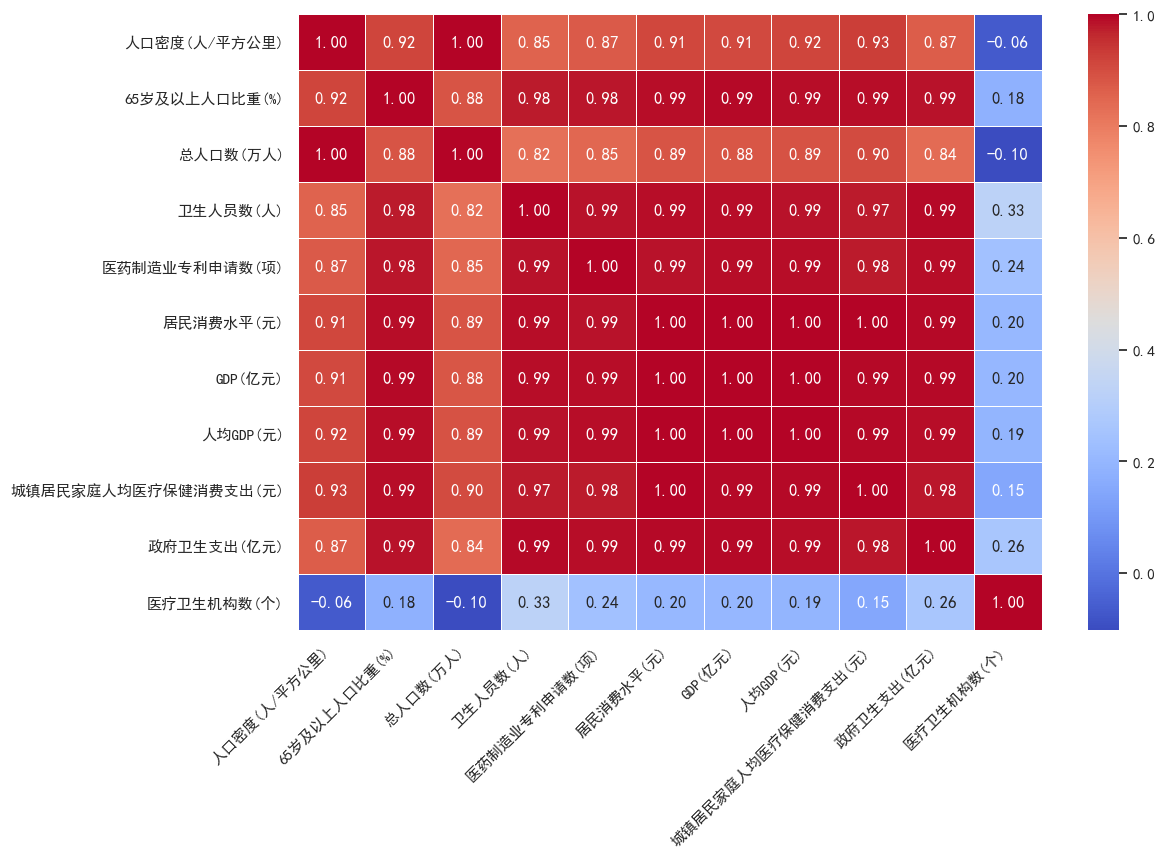

In [8]:
# 计算相关系数矩阵
correlation_matrix = clean_df.corr(method='pearson')

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 使用seaborn绘制热力图来可视化相关性矩阵
plt.figure(figsize=(12, 8))
# 设置字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 设置标题和标签
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# 显示热力图
plt.show()

In [9]:
# 删去人口密度（几乎没有相关性）
clean_df = clean_df.drop(columns=['人口密度(人/平方公里)'])
clean_df

,65岁及以上人口比重(%),总人口数(万人),卫生人员数(人),医药制造业专利申请数(项),居民消费水平(元),GDP(亿元),人均GDP(元),城镇居民家庭人均医疗保健消费支出(元),政府卫生支出(亿元),医疗卫生机构数(个)
0,5.6,114333,6137711.0,273.0,831.0,18873.00,1663,25.67,187.28,1012690
1,6.0,115823,6278458.0,273.0,916.0,22005.60,1912,33.59,204.05,1003769
2,6.2,117171,6409307.0,273.0,1057.0,27194.50,2334,41.51,228.61,1001310
3,6.2,118517,6540522.0,273.0,1332.0,35673.20,3027,56.89,272.06,1000531
4,6.4,119850,6630710.0,273.0,1799.0,48637.50,4081,82.89,342.28,1005271
5,6.2,121121,6704395.0,273.0,2329.0,61340.00,5091,110.11,387.34,994409
6,6.4,122389,6735097.0,168.0,2763.0,71813.60,5898,143.28,461.61,1078131
7,6.5,123626,6833962.0,257.0,2974.0,79715.00,6481,179.68,523.56,1048657
8,6.7,124761,6863315.0,275.0,3122.0,85195.50,6860,205.20,590.06,1042885
9,6.9,125786,6894985.0,283.0,3340.0,90564.40,7229,245.60,640.96,1017673


C:\Users\admin\AppData\Local\Temp\ipykernel_42848\789745188.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




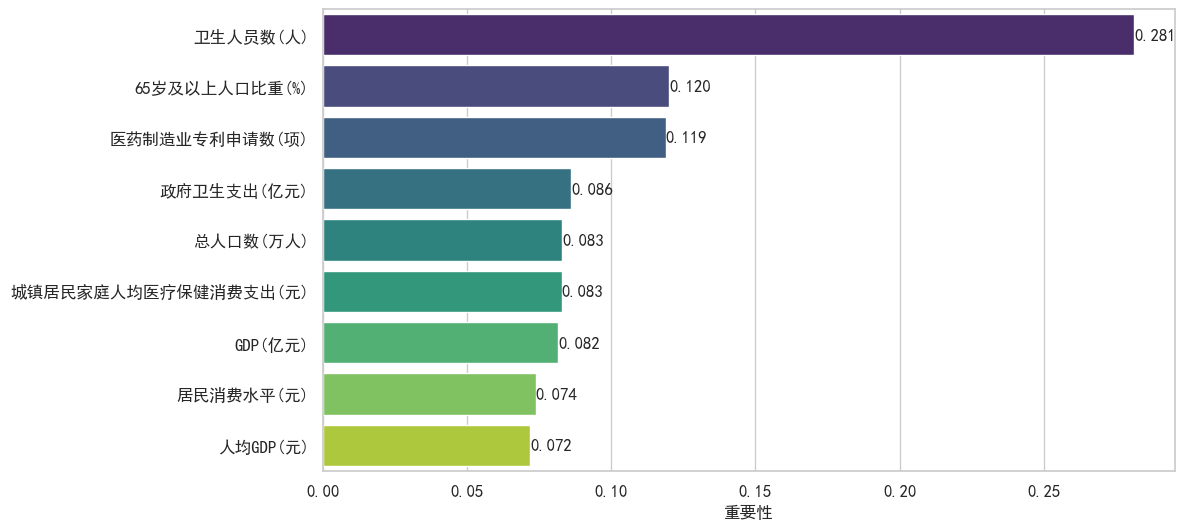

In [10]:
# 目标值为“医疗卫生机构数(个)”，其余列为特征

# 定义特征和目标变量
X = clean_df.drop(columns=['医疗卫生机构数(个)'])
y = clean_df['医疗卫生机构数(个)']

# 对特征数据进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 使用随机森林进行特征重要性分析
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 获取特征重要性
feature_importances = model.feature_importances_

# 创建特征重要性数据框
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 按重要性降序排列
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 使用Seaborn可视化特征重要性
plt.figure(figsize=(11, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# 为每个条形添加数值标记
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')

# 设置标题和标签
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('重要性')
plt.ylabel('')

# 显示图表
plt.show()

预测未来10年

[I 2024-08-25 01:39:04,987] A new study created in memory with name: no-name-ce321bd3-8199-405e-93ae-c768263bad7f
C:\Users\admin\AppData\Local\Temp\ipykernel_42848\4088153925.py:39: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-08-25 01:39:06,566] Trial 0 finished with value: -0.746949145585253 and parameters: {'lr': 0.0016857005379607663, 'epochs': 285, 'hidden_size': 62, 'num_layers': 3}. Best is trial 0 with value: -0.746949145585253.
C:\Users\admin\AppData\Local\Temp\ipykernel_42848\4088153925.py:39: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-08-25 01:39:07,880] Trial 1 finished with value: -0.6277221069834971 and parameters: {'lr': 0.000471209761

<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

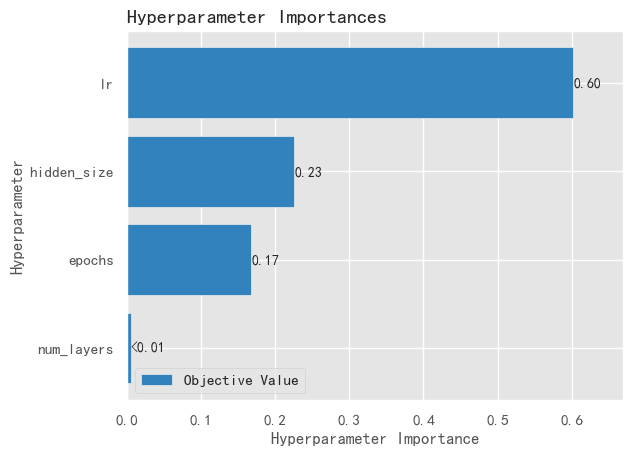

In [58]:
import optuna
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

features = clean_df.drop(columns=['医疗卫生机构数(个)'])  # 特征变量
target = clean_df['医疗卫生机构数(个)']  # 目标变量

# 数据归一化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# 转换为 PyTorch 张量
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
target_tensor = torch.tensor(target_scaled, dtype=torch.float32)

# 将数据划分为训练集和测试集（使用最后5年数据进行测试）
train_size = int(len(clean_df) * 0.8)
train_features = features_tensor[:train_size]
train_target = target_tensor[:train_size]
test_features = features_tensor[train_size:]
test_target = target_tensor[train_size:]

# 构建数据加载器
batch_size = 16
train_dataset = TensorDataset(train_features, train_target)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# 定义目标函数
def objective(trial):
    # 超参数的搜索空间
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    epochs = trial.suggest_int('epochs', 50, 300)
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    
    # LSTM模型
    class LSTMModel(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size):
            super(LSTMModel, self).__init__()
            self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_size, output_size)
        
        def forward(self, x):
            h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
            c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
            output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
            output = self.fc(output[:, -1, :])
            return output

    # 模型设置
    model = LSTMModel(input_size=features_tensor.shape[1], hidden_size=hidden_size, 
                      num_layers=num_layers, output_size=1).to(device)
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    model.train()
    for epoch in range(epochs):
        for features_batch, target_batch in train_loader:
            features_batch = features_batch.unsqueeze(1).to(device)
            target_batch = target_batch.to(device)
            
            outputs = model(features_batch)
            loss = criterion(outputs, target_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        predictions = []
        for i in range(len(test_features)):
            input_data = test_features[i].unsqueeze(0).unsqueeze(0).to(device)
            output = model(input_data)
            predictions.append(output.item())
        
        predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
        # 将预测值和真实值都转化为1D数组
    predictions_flat = predictions.flatten()
    test_target_flat = scaler.inverse_transform(test_target.numpy().reshape(-1, 1)).flatten()

    # 计算R2分数
    r2 = r2_score(test_target_flat, predictions_flat)
    
    return -r2

# 创建Optuna研究对象并优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 可视化结果
optuna.visualization.matplotlib.plot_param_importances(study)

C:\Users\admin\AppData\Local\Temp\ipykernel_42848\437109074.py:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Parallel Coordinate Plot'}>

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


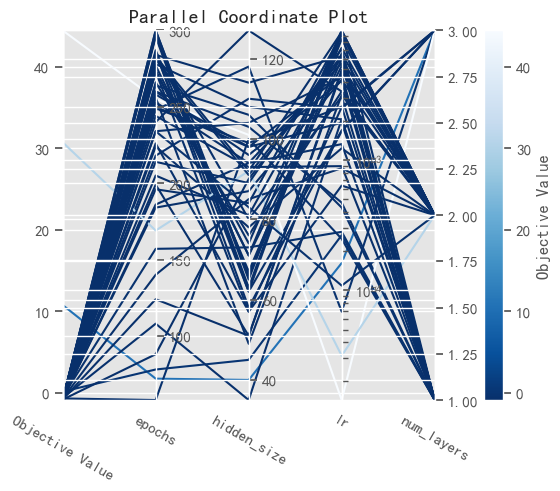

In [59]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study)

In [60]:
study.best_params

{'lr': 0.009596038092408676, 'epochs': 283, 'hidden_size': 92, 'num_layers': 1}

使用最佳参数进行预测

In [69]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子以保证结果的可复现性
torch.manual_seed(42)

In [70]:
features = clean_df.drop(columns=['医疗卫生机构数(个)'])  # 特征变量
target = clean_df['医疗卫生机构数(个)']  # 目标变量

# 数据归一化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# 转换为 PyTorch 张量
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
target_tensor = torch.tensor(target_scaled, dtype=torch.float32)

# 将数据划分为训练集和测试集（使用最后5年数据进行测试）
train_size = int(len(clean_df) * 0.8)
train_features = features_tensor[:train_size]
train_target = target_tensor[:train_size]
test_features = features_tensor[train_size:]
test_target = target_tensor[train_size:]

# 构建数据加载器
batch_size = 16
train_dataset = TensorDataset(train_features, train_target)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)


In [71]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # 隐状态
        c_0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)  # 单元状态
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        output = self.fc(output[:, -1, :])
        return output

# 模型超参数
input_size = features_tensor.shape[1]
hidden_size = 92
num_layers = 1
output_size = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

In [72]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.009596038092408676)

Epoch [10/283], Loss: 0.0411
Epoch [20/283], Loss: 0.0332
Epoch [30/283], Loss: 0.0228
Epoch [40/283], Loss: 0.0192
Epoch [50/283], Loss: 0.0179
Epoch [60/283], Loss: 0.0166
Epoch [70/283], Loss: 0.0150
Epoch [80/283], Loss: 0.0129
Epoch [90/283], Loss: 0.0104
Epoch [100/283], Loss: 0.0131
Epoch [110/283], Loss: 0.0088
Epoch [120/283], Loss: 0.0077
Epoch [130/283], Loss: 0.0072
Epoch [140/283], Loss: 0.0070
Epoch [150/283], Loss: 0.0069
Epoch [160/283], Loss: 0.0068
Epoch [170/283], Loss: 0.0067
Epoch [180/283], Loss: 0.0067
Epoch [190/283], Loss: 0.0066
Epoch [200/283], Loss: 0.0066
Epoch [210/283], Loss: 0.0065
Epoch [220/283], Loss: 0.0064
Epoch [230/283], Loss: 0.0064
Epoch [240/283], Loss: 0.0063
Epoch [250/283], Loss: 0.0062
Epoch [260/283], Loss: 0.0062
Epoch [270/283], Loss: 0.0061
Epoch [280/283], Loss: 0.0060


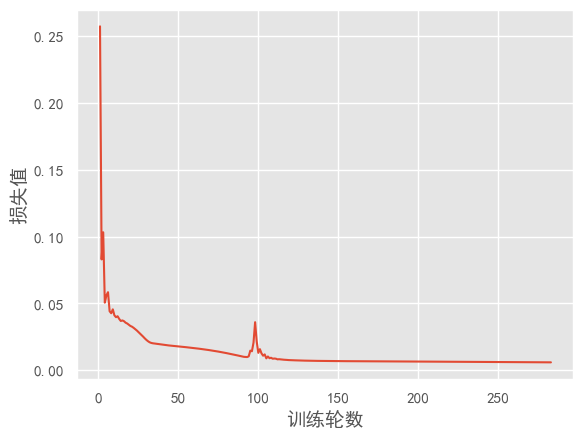

In [73]:
import torch
import matplotlib.pyplot as plt

num_epochs = 283

# 初始化损失值列表
loss_values = []

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for features_batch, target_batch in train_loader:
        features_batch = features_batch.unsqueeze(1).to(device)
        target_batch = target_batch.to(device)
        
        # 前向传播
        outputs = model(features_batch)
        loss = criterion(outputs, target_batch)
        
        # 反向传播与优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 累积每个 batch 的损失
        epoch_loss += loss.item()
    
    # 计算并记录每个 epoch 的平均损失
    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_epoch_loss)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# 绘制损失值变化曲线
plt.plot(range(1, num_epochs + 1), loss_values)
plt.xlabel('训练轮数', fontsize=14)
plt.ylabel('损失值', fontsize=14)
plt.show()

In [74]:
model.eval()
predictions = []

# 返回模型在测试集上的预测数据
with torch.no_grad():
    for i in range(len(test_features)-1):
        input_data = test_features[i].unsqueeze(0).unsqueeze(0).to(device)
        output = model(input_data)
        predictions.append(output.item())


# 预测未来10年
future_years = 10

# 使用最后一个时间点的数据作为起始点
input_seq = test_features[-1, :].unsqueeze(0).unsqueeze(1).to(device)

for _ in range(future_years):
    with torch.no_grad():
        pred = model(input_seq)
        predictions.append(pred.item())
        
        # 将预测的结果作为下一次预测的输入
        input_seq = torch.cat((input_seq[:, :, 1:], pred.unsqueeze(2)), dim=2)

# 反归一化
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 打印预测结果
print("过去6年和未来10年的机构数预测：", predictions.flatten())

过去6年和未来10年的机构数预测： [ 990834.68400478  996135.20820904 1004520.61753464 1016686.07544899
 1033558.47197723 1048697.74054432 1056154.57444286 1054077.49484444
 1058249.57764244 1054425.93548489 1048564.77205658 1048197.97025871
 1050249.59056473 1037552.09664154 1039274.70704651 1040722.25661755]


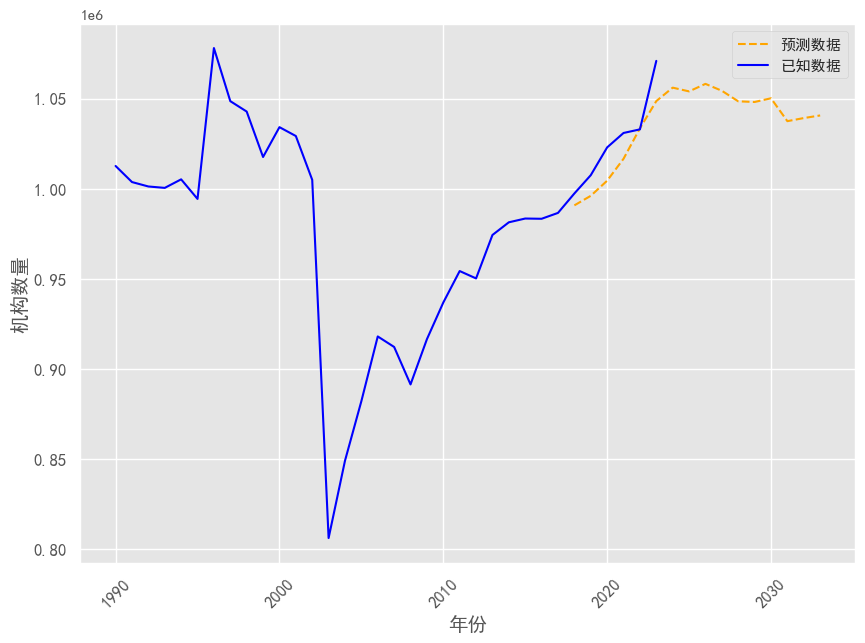

In [75]:
# 将预测数据和实际数据进行拼接
pred_years = list(range(2024, 2034))
pre_years = [i for i in range(2018, 2024)] + pred_years
all_pred = np.array(predictions.flatten())

# 可视化所有已知数据和预测数据
plt.figure(figsize=(10, 7))
plt.plot(pre_years, all_pred, label='预测数据', linestyle='--', color='orange')
plt.plot([i for i in range(1990, 2024)], clean_df['医疗卫生机构数(个)'], label='已知数据', color='blue')

plt.xlabel('年份', fontsize=14)
plt.ylabel('机构数量', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# 输出预测的未来十年机构数
pred_df = pd.DataFrame({
    '年份': pre_years,
    '机构数': all_pred
})

pred_df.to_csv('./results/predictions_10.csv', index=False)